<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/01_pytorch_workflow_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. PyTorch Workflow Exercise Template

The following is a template for the PyTorch workflow exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [138]:
# Import necessary libraries
import torch
import numpy as np

In [139]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total. 
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: [0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909]
y: [0.9        0.9030303  0.90606061 0.90909091 0.91212121 0.91515152
 0.91818182 0.92121212 0.92424242 0.92727273]


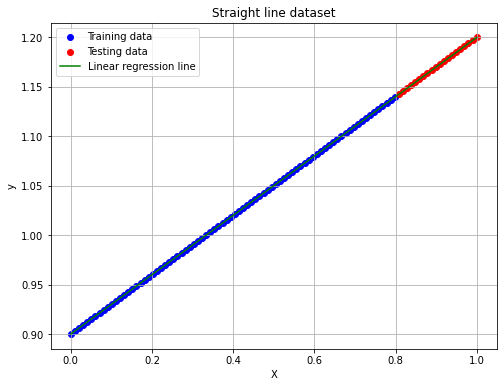

In [140]:

import numpy as np
import matplotlib.pyplot as plt

# Set weight and bias
weight = 0.3
bias = 0.9

# Generate data using linear regression and numpy
num_samples = 100
X = np.linspace(0, 1, num_samples)
y = weight * X + bias

# Split data into training and testing sets
train_idx = int(0.8 * num_samples)
X_train = X[:train_idx]
y_train = y[:train_idx]
X_test = X[train_idx:]
y_test = y[train_idx:]

# Print number of samples
print(f"Number of X samples: {num_samples}")
print(f"Number of y samples: {num_samples}")

# Print first 10 X & y samples
print("First 10 X & y samples:")
print(f"X: {X_train[:10]}")
print(f"y: {y_train[:10]}")

# Plot training and testing data
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Testing data')

# Plot the line
plt.plot(X, weight * X + bias, color='green', label='Linear regression line')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Straight line dataset')
plt.legend()
plt.grid(True)
plt.show()

## 2. Build a PyTorch model by subclassing `nn.Module`. 
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`. 
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1. 
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [141]:
# Create PyTorch linear regression model by subclassing nn.Module
import torch
from torch import nn

class LinearRegression(nn.Module):

    def __init__(self):
        super(LinearRegression, self).__init__()
        # Define randomly initialized weights and bias
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True))

    def forward(self, x):
        # Compute the linear regression function
        return x * self.weights + self.bias

# Create an instance of the model
model = LinearRegression()

# Print the model's state_dict
print(model.state_dict())

# Instantiate the model and put it to the target device
model = model.to(device)


OrderedDict([('weights', tensor([-0.2852])), ('bias', tensor([0.6499]))])


## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively. 
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [142]:
import torch
import torch.optim as optim
import numpy as np

batch_size = 32

# Create the loss function and optimizer
loss_fn = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

if type(X_test) == np.ndarray and type(y_test) == np.ndarray:

    X_test = torch.from_numpy(X_test)
    y_test = torch.from_numpy(y_test)
    X_test = X_test.to(device)
    y_test = y_test.to(device)

# Define the training loop
num_epochs = 300
for epoch in range(num_epochs):
    # Shuffle the training data
    perm = np.random.permutation(len(X_train))
    X_train_shuffled = X_train[perm]
    y_train_shuffled = y_train[perm]

    # Train the model on the training data
    for i in range(0, len(X_train_shuffled), batch_size):
        X_batch = X_train_shuffled[i:i+batch_size]
        y_batch = y_train_shuffled[i:i+batch_size]

        # Move the data to the target device
        X_batch = torch.from_numpy(X_batch)
        y_batch = torch.from_numpy(y_batch)
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Compute the model's predictions
        y_train_pred = model(X_batch)

        # Compute the loss w/ preds from training data and target values
        train_loss = loss_fn(y_train_pred, y_batch)

        # Compute the gradients
        train_loss.backward()

        # Update the model parameters using the loss function data
        optimizer.step()

    # Test the model on the test data every 20 epochs
    if epoch % 20 == 0:

        # Compute the model's predictions on test data
        y_test_pred = model(X_test)

        # Compute the loss on test data
        test_loss = loss_fn(y_test_pred, y_test)

        # Print the loss for both training and testing data
        print('Epoch:', epoch, 'Training Loss:', train_loss.item(), 'Testing Loss:', test_loss.item())



Epoch: 0 Training Loss: 0.5409789259686614 Testing Loss: 0.737729273781632
Epoch: 20 Training Loss: 0.06686985498068465 Testing Loss: 0.18279487535056443
Epoch: 40 Training Loss: 0.06419276412237775 Testing Loss: 0.12534206440352433
Epoch: 60 Training Loss: 0.03533593724208949 Testing Loss: 0.07561783226150456
Epoch: 80 Training Loss: 0.011799485646564571 Testing Loss: 0.022046458058887067
Epoch: 100 Training Loss: 0.00422987039342073 Testing Loss: 0.004753930279702845
Epoch: 120 Training Loss: 0.007024853157274691 Testing Loss: 0.001243887856753212
Epoch: 140 Training Loss: 0.0065947568326285635 Testing Loss: 0.0017803939303966398
Epoch: 160 Training Loss: 0.006495919067299752 Testing Loss: 0.0016491031104868383
Epoch: 180 Training Loss: 0.004707193837472902 Testing Loss: 0.006086587333920035
Epoch: 200 Training Loss: 0.0013633938713206312 Testing Loss: 0.011123326721817539
Epoch: 220 Training Loss: 0.004275274999213985 Testing Loss: 0.010304030926540642
Epoch: 240 Training Loss: 0.00

## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

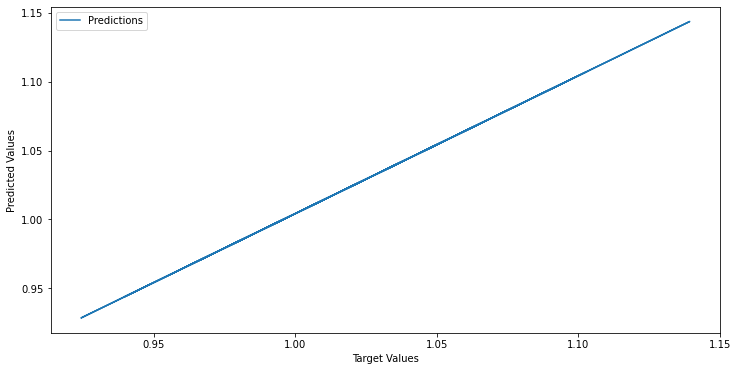

In [143]:

# Track predictions and corresponding target values
y_preds = []
batch_data = []

y_preds.extend(y_train_pred.cpu().detach().numpy())
batch_data.extend(y_batch.cpu().detach().numpy())

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(batch_data, y_preds, label='Predictions')
plt.xlabel('Target Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()



## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [144]:
from pathlib import Path
# Save predictions into y_train_preds again since it went through another full training loop include calculating loss and optimizing

y_train_pred = model(X_batch)

# Save model and create a new one
torch.save(model.state_dict(), 'model.pth')

new_model = LinearRegression()

#Put model on GPU

new_model.to(device)

# Load the saved state_dict into the new model
new_model.load_state_dict(torch.load('model.pth'))

# Perform predictions on test data with the loaded model
y_pred_new = new_model(X_batch)

if torch.allclose(y_train_pred, y_pred_new):
  print("Results from original model and loaded model match")
else:
  print("Results do not match")


print('Successfully loaded model and made predictions')



Results from original model and loaded model match
Successfully loaded model and made predictions
